In [5]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [6]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [7]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

grifols = df[df['empresa'] == 'Grifols']

grifols.shape

(1325, 10)

In [8]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

grifols = grifols [['date','open','high','low','close','adj close']]

grifols.shape

(1325, 6)

In [9]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

grifols['date'] = pd.to_datetime(grifols['date'], format="%Y-%m-%d")

grifols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 21875 to 23199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [10]:
# Paso 5: Ordenar el DF por fecha

grifols.sort_values(by='date',ascending= True, inplace=True)

grifols.head()

,date,open,high,low,close,adj close
22765,2019-01-02,22.559999,22.730000,22.180000,22.730000,21.937431
22764,2019-01-03,22.719999,22.930000,22.500000,22.809999,22.014643
22763,2019-01-04,23.090000,23.860001,22.809999,23.570000,22.748142
22762,2019-01-07,23.590000,23.670000,23.309999,23.549999,22.728840
22761,2019-01-08,23.590000,24.160000,23.590000,23.900000,23.066635


In [11]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

grifols = grifols[(grifols['date'] >= fecha_inicio) & (grifols['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

grifols.shape

(812, 6)

In [12]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=grifols['date'].min(), end=grifols['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

grifols = grifols.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

grifols = grifols.rename(columns={'index': 'date'})


In [13]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

grifols.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,24.170000,24.250000,23.879999,24.090000,23.695877
1,2021-01-05,23.980000,24.150000,23.639999,24.080000,23.686041
2,2021-01-06,24.080000,24.190001,23.740000,23.940001,23.548330
3,2021-01-07,24.129999,24.209999,23.790001,23.830000,23.440130
4,2021-01-08,23.830000,24.090000,23.540001,23.820000,23.430294
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,23.830000,23.940001,23.610001,23.629999,23.243401
8,2021-01-12,23.730000,24.170000,23.639999,23.930000,23.538494
9,2021-01-13,24.020000,24.160000,23.760000,24.160000,23.764730


In [14]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

grifols = grifols.fillna(method='ffill')

In [15]:
# Paso 10: Comprobar que se han introducido los valores correctamente


grifols.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,24.170000,24.250000,23.879999,24.090000,23.695877
1,2021-01-05,23.980000,24.150000,23.639999,24.080000,23.686041
2,2021-01-06,24.080000,24.190001,23.740000,23.940001,23.548330
3,2021-01-07,24.129999,24.209999,23.790001,23.830000,23.440130
4,2021-01-08,23.830000,24.090000,23.540001,23.820000,23.430294
5,2021-01-09,23.830000,24.090000,23.540001,23.820000,23.430294
6,2021-01-10,23.830000,24.090000,23.540001,23.820000,23.430294
7,2021-01-11,23.830000,23.940001,23.610001,23.629999,23.243401
8,2021-01-12,23.730000,24.170000,23.639999,23.930000,23.538494
9,2021-01-13,24.020000,24.160000,23.760000,24.160000,23.764730


In [16]:
# Paso 11: Establecer columna 'date' como índice para modelo

grifols = grifols.set_index('date')

grifols.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,24.170000,24.250000,23.879999,24.090000,23.695877
2021-01-05,23.980000,24.150000,23.639999,24.080000,23.686041
2021-01-06,24.080000,24.190001,23.740000,23.940001,23.548330
2021-01-07,24.129999,24.209999,23.790001,23.830000,23.440130
2021-01-08,23.830000,24.090000,23.540001,23.820000,23.430294
2021-01-09,23.830000,24.090000,23.540001,23.820000,23.430294
2021-01-10,23.830000,24.090000,23.540001,23.820000,23.430294
2021-01-11,23.830000,23.940001,23.610001,23.629999,23.243401
2021-01-12,23.730000,24.170000,23.639999,23.930000,23.538494


In [17]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

grifols.index = pd.DatetimeIndex(grifols.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

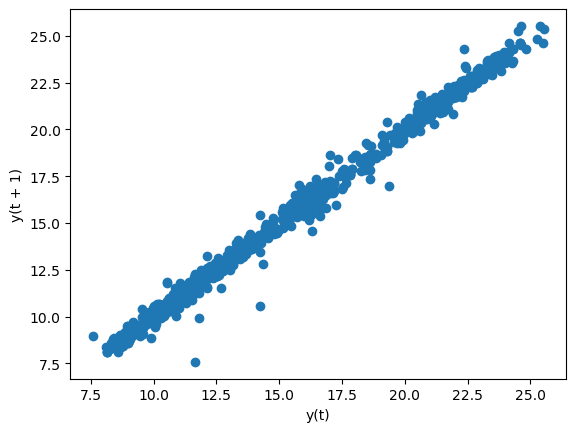

In [18]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(grifols.close)

In [19]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [20]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = grifols.close[:-10], grifols.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [21]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [22]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(grifols.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    10.934988
2024-02-22    10.939958
2024-02-23    10.944910
2024-02-24    10.949844
2024-02-25    10.954761
2024-02-26    10.959660
2024-02-27    10.964542
2024-02-28    10.969406
2024-02-29    10.974253
2024-03-01    10.979083
Freq: D, dtype: float64

In [23]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    10.800
2024-02-22    11.020
2024-02-23    11.495
2024-02-24    11.495
2024-02-25    11.495
2024-02-26    11.770
2024-02-27    11.790
2024-02-28    11.655
2024-02-29     7.584
2024-03-01     8.976
Freq: D, Name: close, dtype: float64

In [24]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.9565242234716423

In [25]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,10.800,10.934988,0.134988
2024-02-22,11.020,10.939958,-0.080042
2024-02-23,11.495,10.944910,-0.550090
2024-02-24,11.495,10.949844,-0.545156
2024-02-25,11.495,10.954761,-0.540239
2024-02-26,11.770,10.959660,-0.810340
2024-02-27,11.790,10.964542,-0.825458
2024-02-28,11.655,10.969406,-0.685594
2024-02-29,7.584,10.974253,3.390253
2024-03-01,8.976,10.979083,2.003083
